In [2]:
!pip install unidecode

     -------------------------------------- 235.9/235.9 kB 4.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast
from unidecode import unidecode
import unicodedata

p1 = pd.read_csv(r'C:\Users\hagar\cuedspeech_perception\material preparation\sentences\data\Pilot_1.csv',encoding='utf-8-sig',index_col=0)
p2 = pd.read_csv(r'C:\Users\hagar\cuedspeech_perception\material preparation\sentences\data\Pilot_2.csv',encoding= 'utf-8-sig',index_col=0)

#organize the data to pred/unpred
p1_info = p1.iloc[:, 0:5].copy()
p2_info = p2.iloc[:, 0:5].copy()


cols = [0,1,2,3,4]
p1.drop(p1.columns[cols],axis=1,inplace=True)
p2.drop(p2.columns[cols],axis=1,inplace=True)

p1 = p1.T
p2 = p2.T

pred1 = p1.iloc[:26,:].copy()
unpred1 = p1.iloc[26:,:].copy()


unpred2 = p2.iloc[:26,:].copy()
pred2 = p2.iloc[26:,:].copy()


frames = [pred1, unpred1, pred2, unpred2]

In [4]:
def clean_char(word):
    new = str(word)
    new = unidecode(word)
    new = new.lower()
    new = new.replace(' ','')
    return new

#clean_char('péché ')



In [5]:
target1 = ['amoureux',
'chien',
'chaude',
'malheur',
'rencontrés',
'nuit',
'dent',
'usée',
'forte',
'fête',
'pas',
'montre',
'voler',
'rouge',
'guerre',
'faire',
'nourrir',
'emploi',
'couteau',
'rire',
'erreur',
'péché',
'serviette',
'creusé',
'juste',
'ami'
]

target2 = ['disparu',
'chiot',
'tonne',
'blague',
'acide',
'hameçon',
'contrat',
'boue',
'badge',
'foule',
'mort',
'raser',
'malade',
'anniversaire',
'construite',
'vite',
'désordre',
'forces',
'outils',
'laver',
'gagné',
'abeille',
'bateau',
'pleurer',
'enterrement',
'pauvreté',
'chat']



In [6]:
# add target column
pred1['target'] = target1
unpred1['target'] = target2

pred2['target'] = target2
unpred2['target'] = target1



In [7]:
# clean chars
for frame in frames:
    for col in frame.columns:
        frame[col] = frame[col].astype(str)
        frame[col] = frame[col].apply(lambda x: clean_char(x))

In [8]:
pred2 = pred2.replace(to_replace =["lehamecon", "sonhamecon", "l'hamecon"]
             ,value ="hamecon") 


In [9]:
#count the num target is in a row
frames = [pred1, unpred1, pred2, unpred2]

for frame in frames:
    n =[]
    for i in range(len(frame)):
        s= 0
        df_ = frame.iloc[i,:-1] == frame.iloc[i,-1]
        s =+ df_.sum()
        n.append(s)
    
    frame['number'] = n
    frame['prob'] = frame['number'].apply(lambda x: x/(len(frame.columns)-2))


In [10]:
# entropy

for frame in frames:
    frame['entropy'] = frame.nunique(axis=1)-2




In [11]:
test = pd.concat(frames)
test.to_csv(r'C:\Users\hagar\cuedspeech_perception\material preparation\sentences\code\temp file for code use\test.csv', encoding= 'utf-8-sig')

In [12]:
new_p1 = pred1[['target','prob','number','entropy']].copy()
new_p1['pred'] = 1

new_p1['sentence_p'] = new_p1.index
new_p1 = new_p1.reset_index(drop=True)

new_u1 = unpred2[['target','prob','number','entropy']].copy()
new_u1['pred'] = 0

new_u1['sentence_u'] = new_u1.index
new_u1 = new_u1.reset_index(drop=True)

new_p2 = pred2[['target','prob','number','entropy']].copy()
new_p2['pred'] = 1

new_p2['sentence_p'] = new_p2.index
new_p2 = new_p2.reset_index(drop=True)

new_u2 = unpred1[['target','prob','number','entropy']].copy()
new_u2['pred'] = 0

new_u2['sentence_u'] = new_u2.index
new_u2 = new_u2.reset_index(drop=True)



df1 = pd.merge(new_p1, new_u1, on='target', how = 'outer')
df2 = pd.merge(new_p2, new_u2, on='target', how = 'outer')



df = pd.concat([df1,df2])
df['diff'] = df['prob_x']-df['prob_y']

df = df.sort_values(['diff'], ascending=True)
df.to_csv(r'C:\Users\hagar\cuedspeech_perception\material preparation\sentences\code\temp file for code use\results_1_and_2.csv', encoding = 'utf-8-sig') 



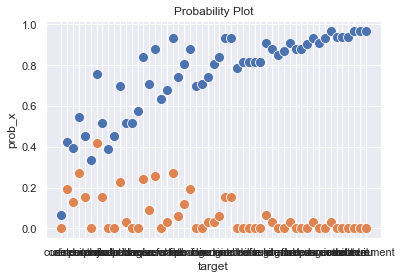

In [13]:
sns.set_context("poster")
sns.set(rc={"figure.figsize":(50, 10)}) #width=50, height=10
fig = sns.scatterplot(data=df, x = 'target', y ='prob_x',s=100)
fig2 = sns.scatterplot(data=df, x = 'target', y ='prob_y',ax =fig,s=100).set(title='Probability Plot')

#fig.figure.savefig("probability_predicatbility.png")


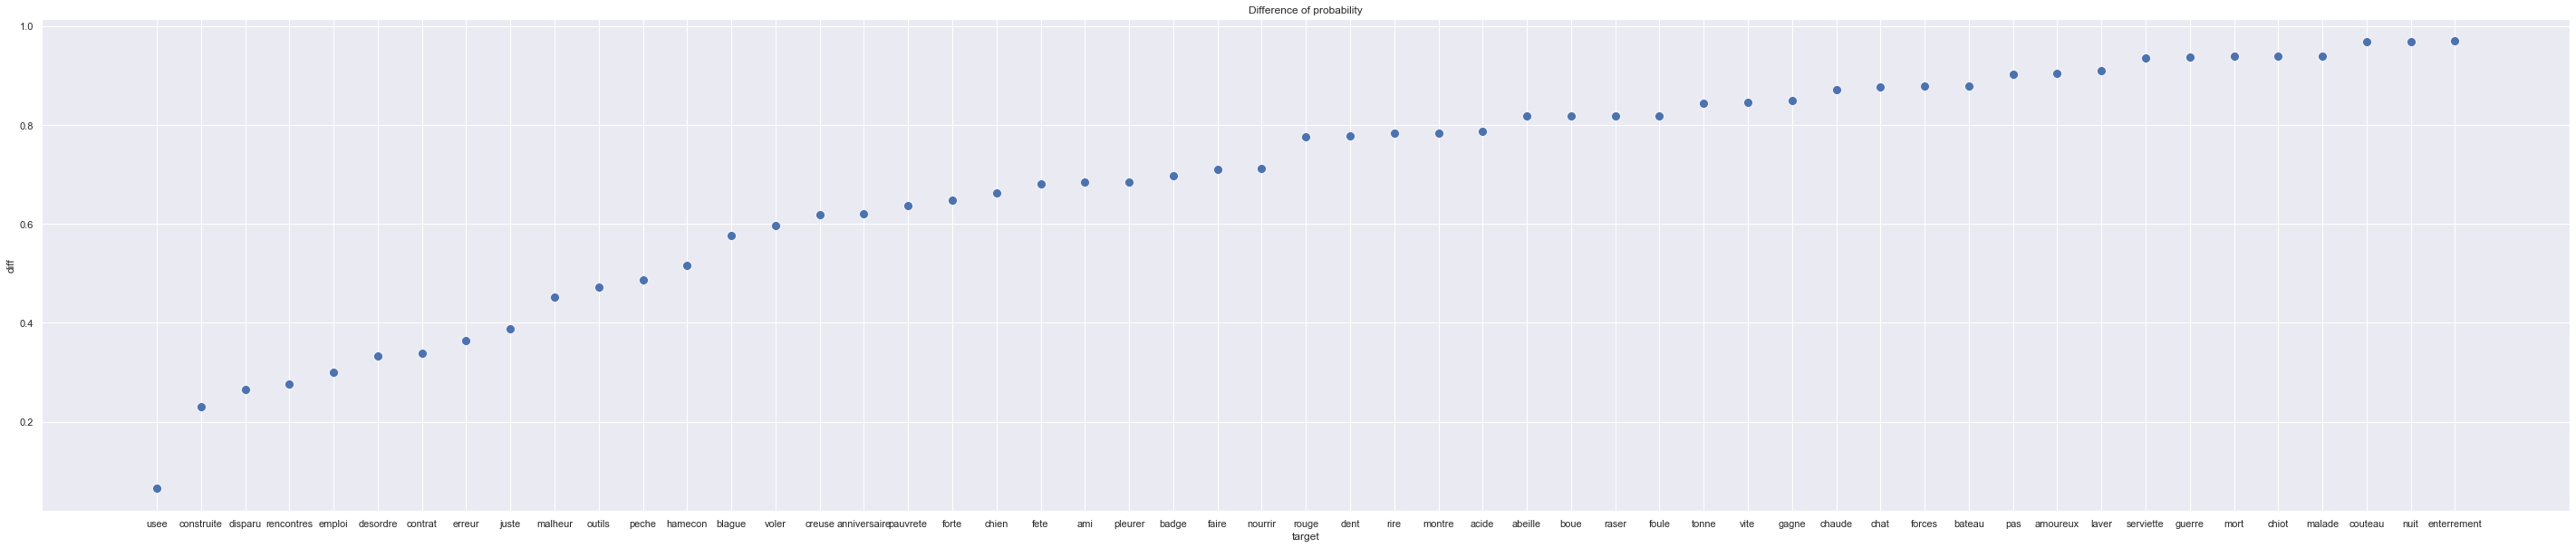

In [14]:
sns.set_context("poster")
sns.set(rc={"figure.figsize":(50, 10)}) #width=50, height=10
fig = sns.scatterplot(data=df, x = 'target', y ='diff',s=100).set(title='Difference of probability')

#fig.figure.savefig("probability_diff.png")
    

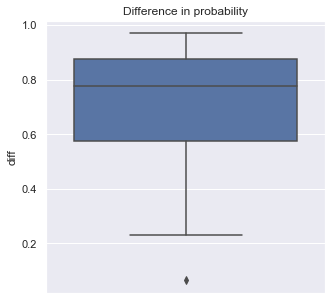

In [15]:

sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(5, 5)}) 
box = sns.boxplot(data=df, y='diff').set(title='Difference in probability')

#box.figure.savefig("3")

In [16]:
new_p1 = pred1[['target','prob','number','entropy']].copy()
new_p1['pred'] = 1

new_p1['sentence'] = new_p1.index
new_p1 = new_p1.reset_index(drop=True)

new_u1 = unpred2[['target','prob','number','entropy']].copy()
new_u1['pred'] = 0

new_u1['sentence'] = new_u1.index
new_u1 = new_u1.reset_index(drop=True)

new_p2 = pred2[['target','prob','number','entropy']].copy()
new_p2['pred'] = 1

new_p2['sentence'] = new_p2.index
new_p2 = new_p2.reset_index(drop=True)

new_u2 = unpred1[['target','prob','number','entropy']].copy()
new_u2['pred'] = 0

new_u2['sentence'] = new_u2.index
new_u2 = new_u2.reset_index(drop=True)


new1 = pd.merge(new_p1, new_u1, on='target', how = 'outer')
new2 = pd.merge(new_p2, new_u2, on='target', how = 'outer')

new = pd.concat([new1,new2])
new.to_csv(r'C:\Users\hagar\cuedspeech_perception\material preparation\sentences\results\pilot1+2.csv',encoding = 'utf-8-sig')

In [17]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(5, 5)}) 
box = sns.boxplot(data=df,x='pred' ,y='prob').set(title='Probability by Predictable (1) vs. Unpredictable(0)')
#box.figure.savefig("box_Probability.png")

ValueError: Could not interpret input 'pred'

In [18]:
#plot entropy
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(5, 5)}) 
box = sns.boxplot(data=df,x='pred' ,y='entropy').set(title='Entropy by Predictable (1) vs. Unpredictable(0)')


#box.figure.savefig("entropy.png")

ValueError: Could not interpret input 'pred'